In [9]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import numpy as np
import utils
import calplot

df= pd.read_csv('C:/Users/Mads Emil/Downloads/Motor_Vehicle_Collisions_-_Crashes_20240416.csv')
# Apply the lowercase function to string columns
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#data type and shorting
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df = df.sort_values(by='CRASH DATE')


#Removing years 2012 and 2024
df['YEAR'] = df['CRASH DATE'].dt.year
df = df[(df['YEAR'] != 2012) & (df['YEAR'] != 2024)]


C:\Users\Mads Emil\AppData\Local\Temp\ipykernel_22716\81901594.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C:/Users/Mads Emil/Downloads/Motor_Vehicle_Collisions_-_Crashes_20240416.csv')


In [3]:
# Specify the value(s) to cut out
values_to_cut_out = [0]

# Create a boolean mask indicating which rows to keep
mask = ~df['NUMBER OF PEDESTRIANS KILLED'].isin(values_to_cut_out)

# Apply the mask to the DataFrame to filter out rows
filtered_df = df[mask]

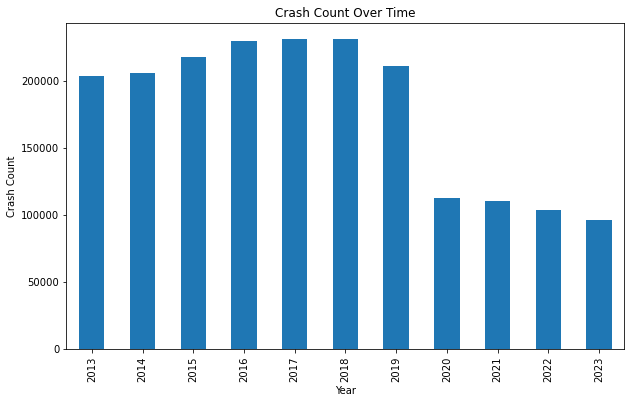

In [4]:
# Sort the DataFrame by the 'Year' column
df_sorted = df.sort_values(by='YEAR')

# Count the occurrences of each year and plot
year_counts = df_sorted["YEAR"].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(10, 6))

# Set plot labels and title
plt.title('Crash Count Over Time')
plt.xlabel('Year')
plt.ylabel('Crash Count')

# Show the plot
plt.show()

In [5]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'YEAR', 'Year'],
      dtype='object')

In [6]:
df["NUMBER OF PEDESTRIANS KILLED"].value_counts()

0    1953860
1       1413
2         12
6          1
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

In [7]:
filtered_df["NUMBER OF PEDESTRIANS KILLED"].value_counts()

1    1413
2      12
6       1
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

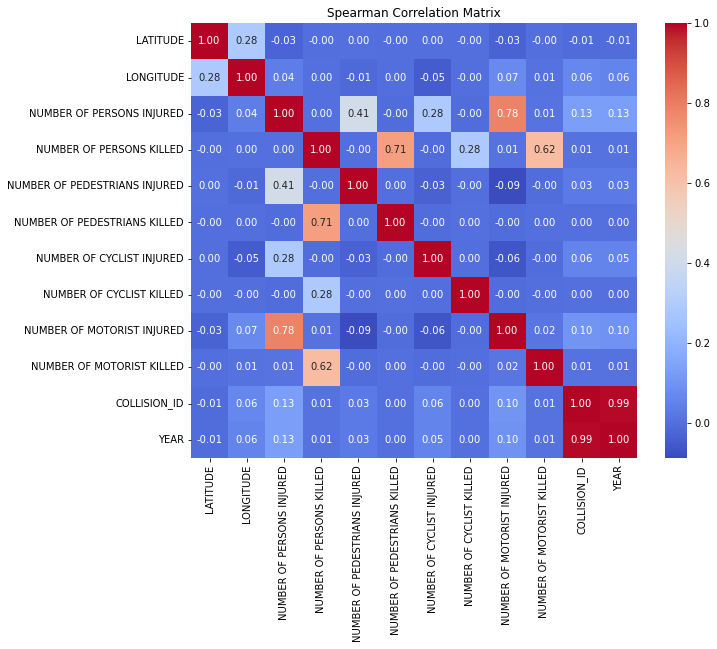

<Figure size 432x288 with 0 Axes>

In [11]:
# Compute the Spearman correlation matrix
spearman_corr_matrix = df.corr(method='spearman')

# Plot the color matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()
plt.savefig(r'C:\Users\Mads Emil\raskong.github.io\Final_Project\Figures\spearman_corr_matrix.png')

<AxesSubplot:>

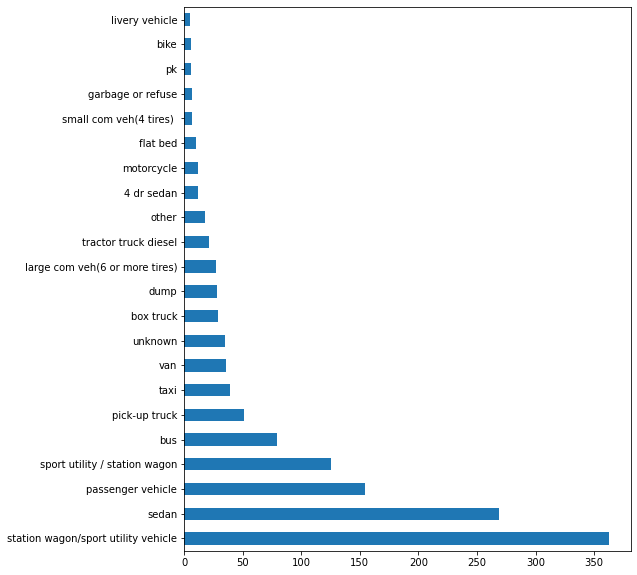

In [22]:
filtered_df["VEHICLE TYPE CODE 1"].value_counts()[:22].plot(kind='barh', figsize = (8,10))

Now it time to clean the data even more: for loop for sorting/combineing the types "sport utility / station wagon" and station wagon/sport utility vehicle

In [23]:
## for loop for sorting/combineing the types "sport utility / station wagon" and station wagon/sport utility vehicle
for num in range(1,6):

    df[f'VEHICLE TYPE CODE {num}'] = df[f'VEHICLE TYPE CODE {num}'].replace('sport utility / station wagon', 'station wagon/sport utility vehicle')

    df["VEHICLE TYPE CODE 1"].value_counts()[:40]

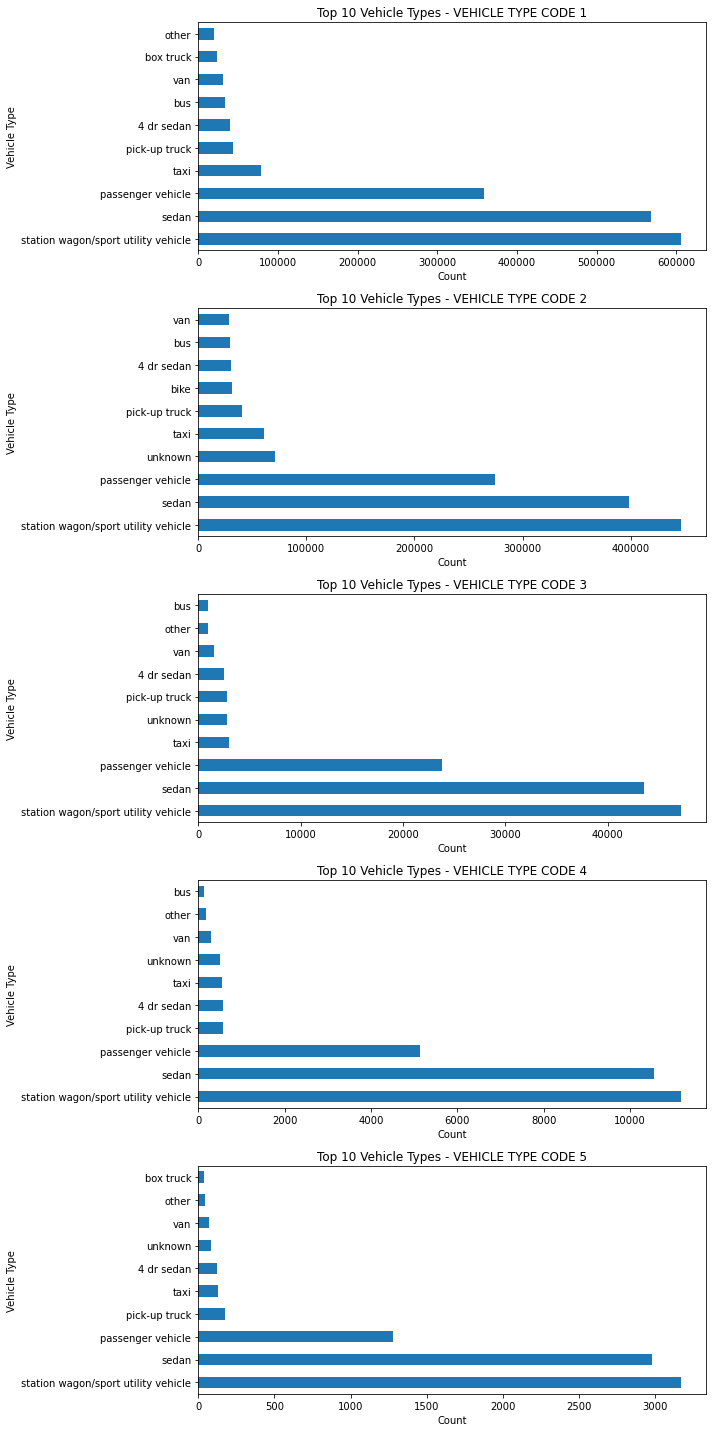

In [24]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

for plot in range(1, 6):
    df[f"VEHICLE TYPE CODE {plot}"].value_counts()[:10].plot(kind='barh', ax=axes[plot-1])
    axes[plot-1].set_title(f"Top 10 Vehicle Types - VEHICLE TYPE CODE {plot}")
    axes[plot-1].set_xlabel("Count")
    axes[plot-1].set_ylabel("Vehicle Type")

plt.tight_layout()
plt.show()   

<AxesSubplot:>

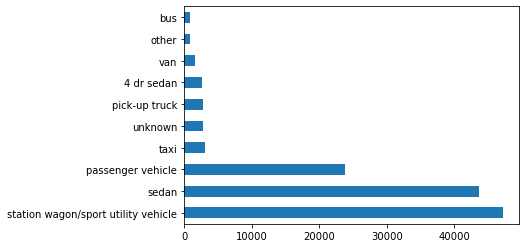

In [25]:
filtered_df["VEHICLE TYPE CODE 3"].value_counts()[:10].plot(kind='barh')

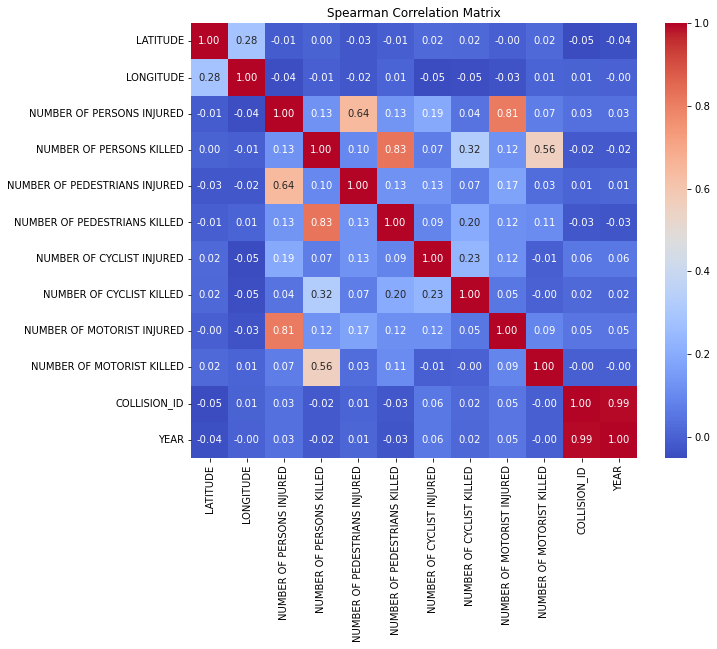

In [26]:
# Compute the Spearman correlation matrix
spearman_corr_matrix = filtered_df.corr(method='spearman')

# Plot the color matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

In [27]:
filtered_df["VEHICLE TYPE CODE 1"].value_counts()[:4]

station wagon/sport utility vehicle    363
sedan                                  269
passenger vehicle                      154
sport utility / station wagon          125
Name: VEHICLE TYPE CODE 1, dtype: int64

In [28]:
kill_ratio_Station_car = 521/635602*100
print("Station car kills:", kill_ratio_Station_car)

kill_ratio_sedan_car = 276/578949*100
print("Sedan car kills:", kill_ratio_sedan_car)

Station car kills: 0.08196953439416489
Sedan car kills: 0.04767259292269267


<AxesSubplot:>

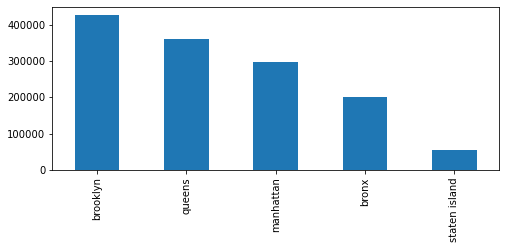

In [29]:
df["BOROUGH"].value_counts()[:70].plot(kind='bar', figsize = (8,3))

<AxesSubplot:>

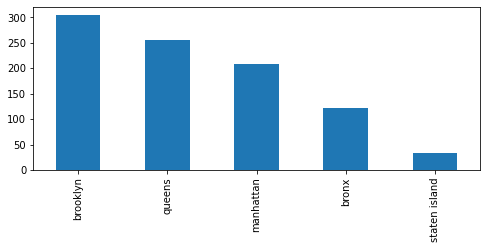

In [30]:
filtered_df["BOROUGH"].value_counts()[:70].plot(kind='bar', figsize = (8,3))

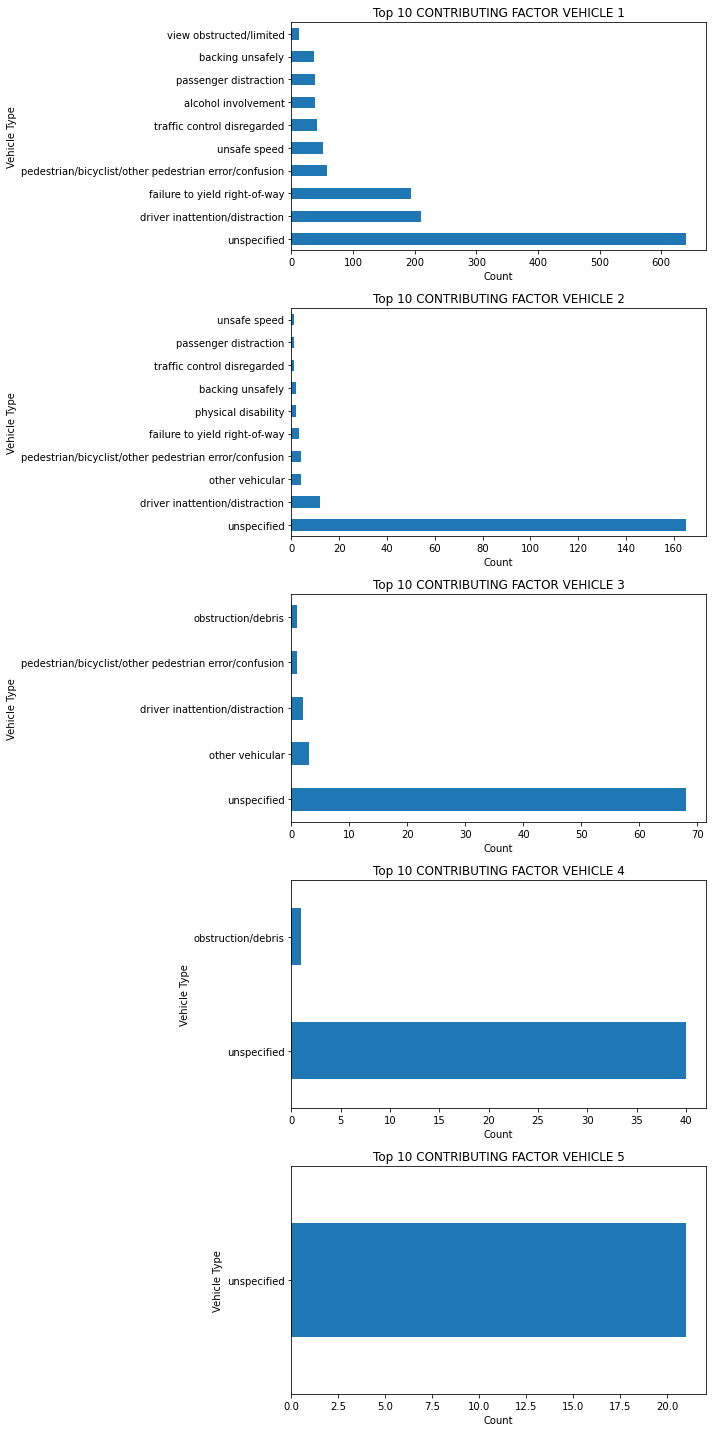

In [31]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

for plot in range(1, 6):
    filtered_df[f"CONTRIBUTING FACTOR VEHICLE {plot}"].value_counts()[:10].plot(kind='barh', ax=axes[plot-1])
    axes[plot-1].set_title(f"Top 10 CONTRIBUTING FACTOR VEHICLE {plot}")
    axes[plot-1].set_xlabel("Count")
    axes[plot-1].set_ylabel("Vehicle Type")

plt.tight_layout()
plt.show()   

In [32]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()[:40]

unspecified                                              642388
driver inattention/distraction                           400160
failure to yield right-of-way                            117880
following too closely                                    109661
backing unsafely                                          73802
other vehicular                                           61320
passing or lane usage improper                            57015
passing too closely                                       51071
turning improperly                                        48609
fatigued/drowsy                                           42370
unsafe lane changing                                      40376
traffic control disregarded                               35253
driver inexperience                                       30833
unsafe speed                                              28232
alcohol involvement                                       21594
reaction to uninvolved vehicle          

In [33]:
print(708007/2080000)

0.34038798076923077


<AxesSubplot:>

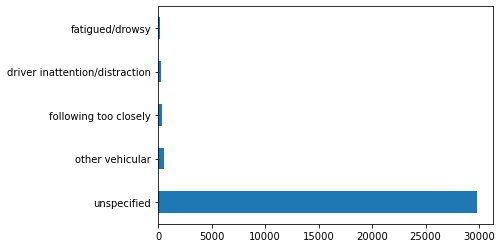

In [34]:
#Takes the colume named [Category] and counts the occurencys at for the [.x] most occ. categorys, and plot it in kind =" bar or barh for rotateing the barchart
df["CONTRIBUTING FACTOR VEHICLE 4"].value_counts()[:5].plot(kind='barh')

In [35]:
df["ON STREET NAME"].describe(include="all")

count                              1534641
unique                               15709
top       broadway                        
freq                                 16090
Name: ON STREET NAME, dtype: object

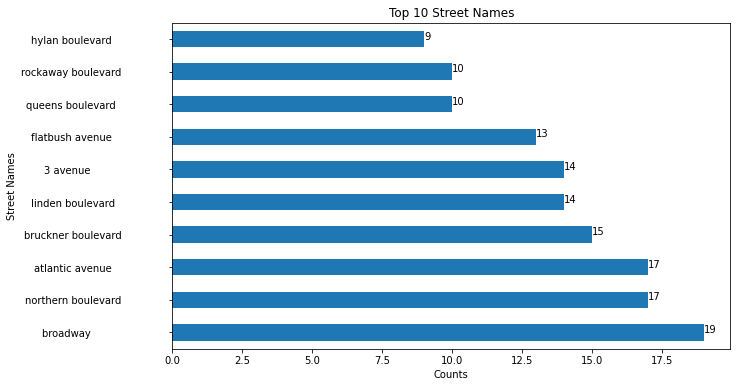

In [36]:
# Sample data
street_counts = filtered_df["ON STREET NAME"].value_counts()[:10]

# Create horizontal bar plot
plt.figure(figsize=[10, 6])
street_counts.plot(kind='barh')

# Add text to each bar with aligned text
for i, count in enumerate(street_counts):
    plt.text(count, i, str(count), ha='left')

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Street Names')
plt.title('Top 10 Street Names')

# Show plot
plt.show()

In [37]:
df["ON STREET NAME"].value_counts()[:20]

broadway                            16090
atlantic avenue                     14394
belt parkway                        13604
3 avenue                            11741
northern boulevard                  11106
long island expressway               9941
brooklyn queens expressway           9761
linden boulevard                     9031
flatbush avenue                      8947
grand central pkwy                   8882
queens boulevard                     8657
2 avenue                             8500
bruckner boulevard                   7797
fdr drive                            7533
5 avenue                             6341
cross bronx expy                     6332
jamaica avenue                       6281
major deegan expressway              6187
cross island parkway                 5886
8 avenue                             5597
Name: ON STREET NAME, dtype: int64

The city’s current default 25 mph speed limit was set in 2014, marking the first citywide reduction in a half-century. The 2014 shift was pushed by then-Mayor Bill de Blasio and approved by the Legislature and former Gov. Andrew Cuomo.
https://www.governing.com/policy/legislation-would-allow-nyc-to-set-its-own-speed-limits



## Calender plot

In [52]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()[:20]

unspecified                       642388
driver inattention/distraction    400160
failure to yield right-of-way     117880
following too closely             109661
backing unsafely                   73802
other vehicular                    61320
passing or lane usage improper     57015
passing too closely                51071
turning improperly                 48609
fatigued/drowsy                    42370
unsafe lane changing               40376
traffic control disregarded        35253
driver inexperience                30833
unsafe speed                       28232
alcohol involvement                21594
reaction to uninvolved vehicle     19921
pavement slippery                  18777
lost consciousness                 18277
prescription medication            13595
view obstructed/limited            13170
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

Defineing Alkohol

In [13]:
Alc_df = df[df["CONTRIBUTING FACTOR VEHICLE 1"] == "alcohol involvement"].copy()

In [66]:
Alk_df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()[:22]

unspecified                                              642388
driver inattention/distraction                           400160
failure to yield right-of-way                            117880
following too closely                                    109661
backing unsafely                                          73802
other vehicular                                           61320
passing or lane usage improper                            57015
passing too closely                                       51071
turning improperly                                        48609
fatigued/drowsy                                           42370
unsafe lane changing                                      40376
traffic control disregarded                               35253
driver inexperience                                       30833
unsafe speed                                              28232
reaction to uninvolved vehicle                            19921
pavement slippery                       

In [56]:
Ice_df = df[df["CONTRIBUTING FACTOR VEHICLE 1"] == "pavement slippery"].copy()


In [57]:
Ice_df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()[:20]

pavement slippery    18777
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

(<Figure size 900x1346.4 with 12 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
        <AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>,
        <AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
        <AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>,
        <AxesSubplot:ylabel='2023'>], dtype=object))

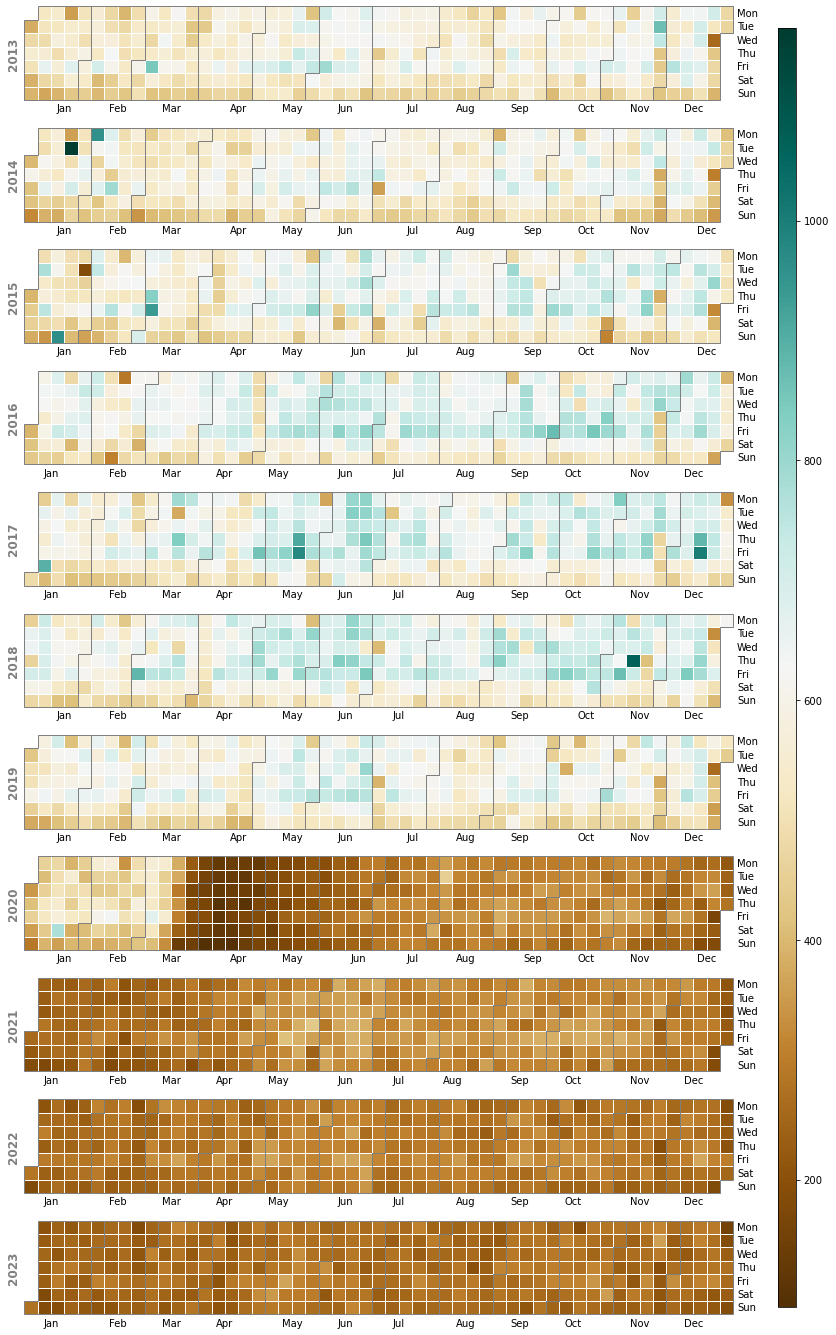

In [39]:
#Selecting the category and obtaining values of occ per Date
#PROSTITUTION_df = df.loc[df.Category=="PROSTITUTION"]

date_counts = df["CRASH DATE"].value_counts()

# Convert the index to dattime format
date_counts.index = pd.to_datetime(date_counts.index)

# Resample the data to daily frequency and fill missing dates
daily_counts = date_counts.resample('D').first()

interpolated_counts = daily_counts.interpolate() 
final_counts = interpolated_counts.head(len(daily_counts))

#round the final_counts
final_counts = final_counts.round(3)

#plot using the calplot  package 
calplot.calplot(final_counts, yearlabel_kws=dict({'fontname':'sans-serif'}, fontsize=12), cmap="BrBG", dropzero=False)

(<Figure size 900x1346.4 with 12 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
        <AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>,
        <AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
        <AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>,
        <AxesSubplot:ylabel='2023'>], dtype=object))

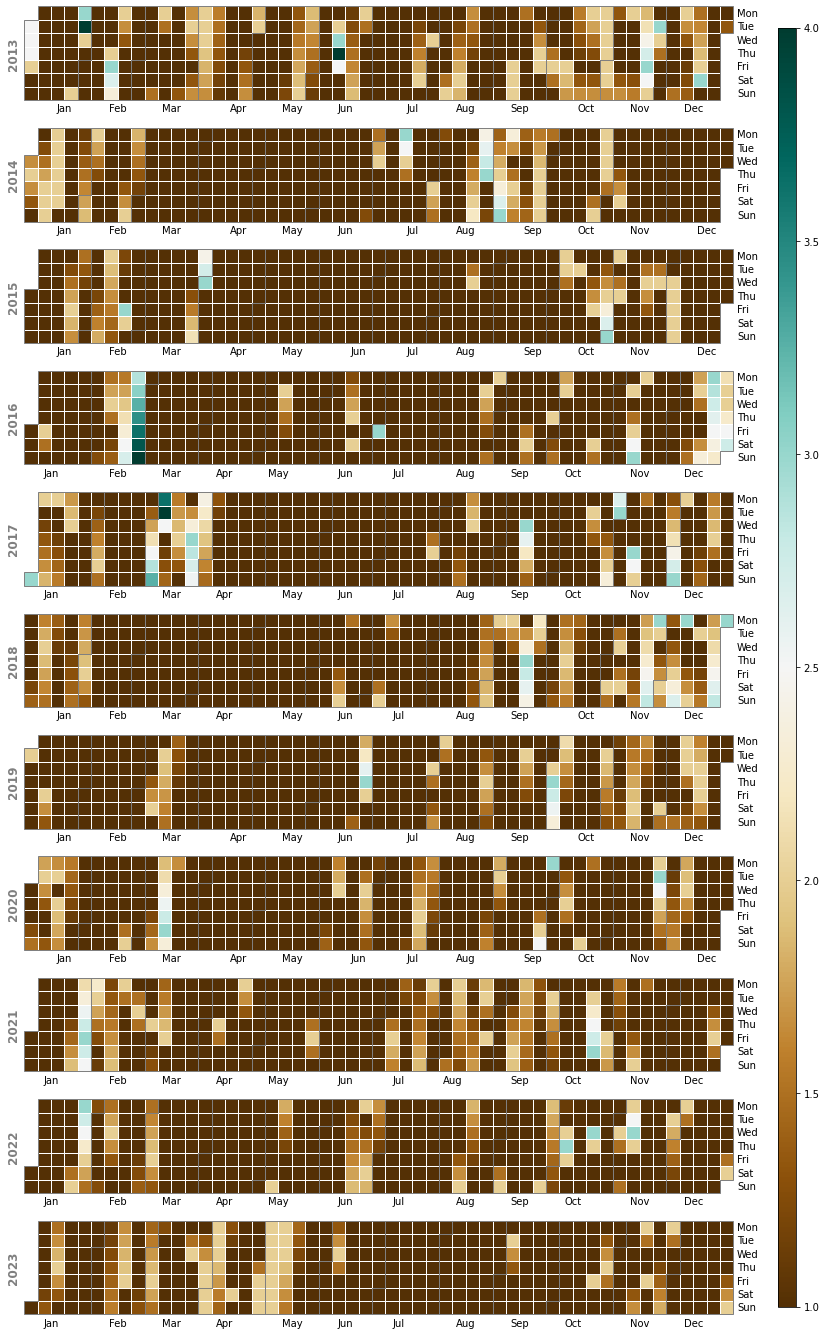

In [40]:
#Selecting the category and obtaining values of occ per Date
#PROSTITUTION_df = df.loc[df.Category=="PROSTITUTION"]

f_date_counts = filtered_df["CRASH DATE"].value_counts()

# Convert the index to dattime format
f_date_counts.index = pd.to_datetime(f_date_counts.index)

# Resample the data to daily frequency and fill missing dates
f_daily_counts = f_date_counts.resample('D').first()

interpolated_counts = f_daily_counts.interpolate() 
f_final_counts = interpolated_counts.head(len(f_daily_counts))

#round the final_counts
f_final_counts = f_final_counts.round(3)

#plot using the calplot  package 
calplot.calplot(f_final_counts, yearlabel_kws=dict({'fontname':'sans-serif'}, fontsize=12), cmap="BrBG", dropzero=False)

In [15]:
#Selecting the category and obtaining values of occ per Date

Ice_date_counts = Ice_df["CRASH DATE"].value_counts()

# Convert the index to dattime format
Ice_date_counts.index = pd.to_datetime(Ice_date_counts.index)

# Resample the data to daily frequency and fill missing dates
Ice_daily_counts = Ice_date_counts.resample('D').first()

interpolated_counts = Ice_daily_counts.interpolate() 
Ice_final_counts = interpolated_counts.head(len(Ice_daily_counts))

#round the final_counts
Ice_final_counts = Ice_final_counts.round(3)

#plot using the calplot  package 
calplot.calplot(Ice_final_counts, yearlabel_kws=dict({'fontname':'sans-serif'}, fontsize=12), cmap="cool", dropzero=False)

NameError: name 'Ice_df' is not defined

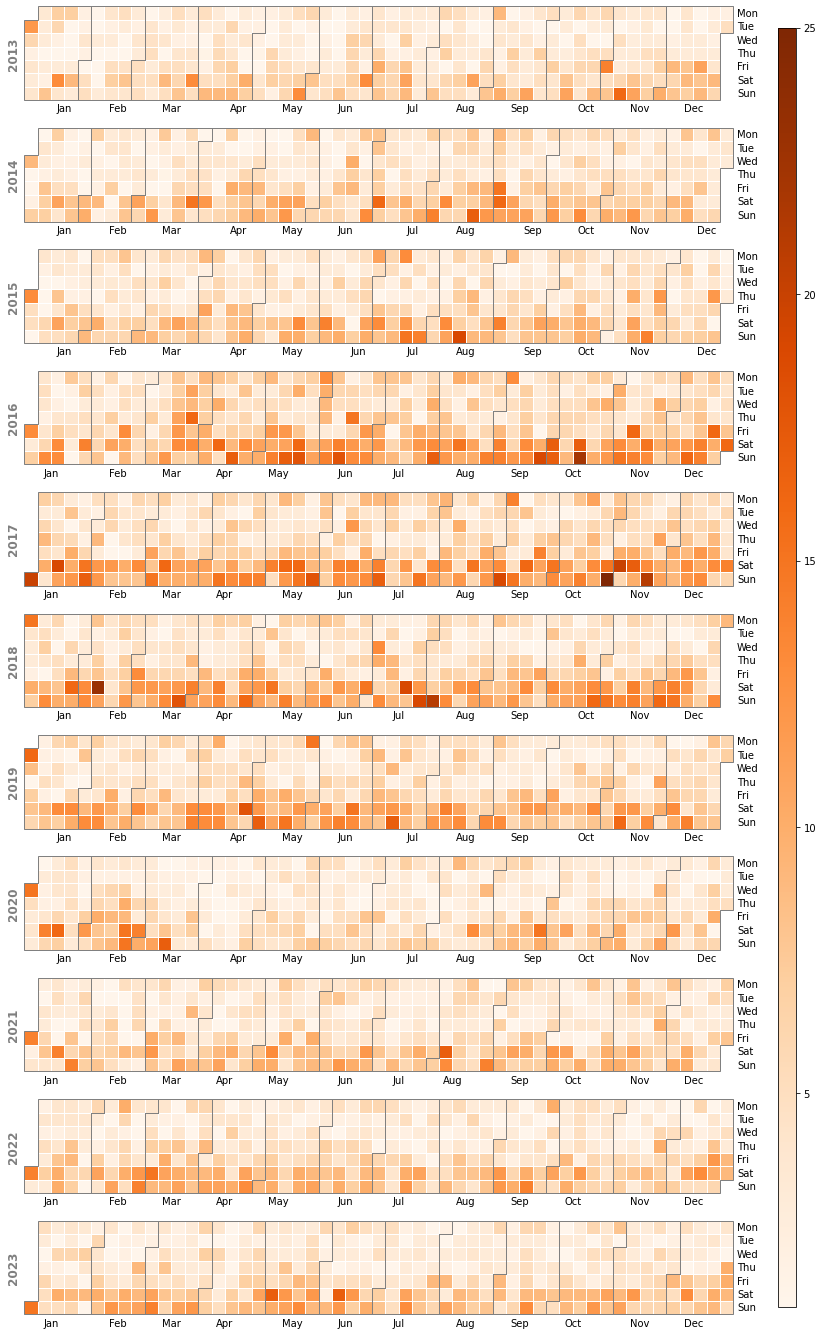

In [18]:
#Selecting the category and obtaining values of occ per Date

Alc_date_counts = Alc_df["CRASH DATE"].value_counts()

# Convert the index to dattime format
Alc_date_counts.index = pd.to_datetime(Alc_date_counts.index)

# Resample the data to daily frequency and fill missing dates
Alc_daily_counts = Alc_date_counts.resample('D').first()

interpolated_counts = Alc_daily_counts.interpolate() 
Alc_final_counts = interpolated_counts.head(len(Alc_daily_counts))

#round the final_counts
Alc_final_counts = Alc_final_counts.round(3)

#plot using the calplot  package 
calplot.calplot(Alc_final_counts, yearlabel_kws=dict({'fontname':'sans-serif'}, fontsize=12), cmap="O", dropzero=False)

plt.savefig(r"C:\Users\Mads Emil\raskong.github.io\Final_Project\Figures\Alc_calender_plot.png", bbox_inches='tight')




In [43]:
Alk_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR,Year
1822363,2013-01-01,3:10,NaN,NaN,NaN,NaN,NaN,pitkin avenue,howard avenue,NaN,...,NaN,NaN,161083,passenger vehicle,passenger vehicle,NaN,NaN,NaN,2013,2013
1835490,2013-01-01,6:15,NaN,NaN,40.732941,-73.920382,"(40.7329414, -73.9203819)",NaN,NaN,NaN,...,unspecified,NaN,3045083,passenger vehicle,passenger vehicle,passenger vehicle,passenger vehicle,NaN,2013,2013
1834667,2013-01-01,3:26,queens,11426,40.735953,-73.714738,"(40.7359534, -73.7147376)",253 street,hillside avenue,NaN,...,NaN,NaN,221921,station wagon/sport utility vehicle,passenger vehicle,station wagon/sport utility vehicle,NaN,NaN,2013,2013
1825962,2013-01-01,5:43,brooklyn,11205,40.696208,-73.961586,"(40.6962076, -73.9615863)",classon avenue,park avenue,NaN,...,NaN,NaN,192309,passenger vehicle,passenger vehicle,NaN,NaN,NaN,2013,2013
1829725,2013-01-01,2:05,manhattan,10065,40.761857,-73.963425,"(40.7618573, -73.9634255)",2 avenue,east 61 street,NaN,...,NaN,NaN,47042,other,van,NaN,NaN,NaN,2013,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055805,2023-12-31,20:06,staten island,10312.0,40.541656,-74.166100,"(40.541656, -74.1661)",amboy road,waimer place,NaN,...,NaN,NaN,4691542,station wagon/sport utility vehicle,station wagon/sport utility vehicle,NaN,NaN,NaN,2023,2023
2055763,2023-12-31,12:45,queens,11377.0,40.739983,-73.903120,"(40.739983, -73.90312)",NaN,NaN,46-10 61 street,...,NaN,NaN,4691935,station wagon/sport utility vehicle,NaN,NaN,NaN,NaN,2023,2023
2055780,2023-12-31,1:00,brooklyn,11233.0,40.670895,-73.914050,"(40.670895, -73.91405)",boyland street,east new york avenue,NaN,...,NaN,NaN,4691308,pick-up truck,sedan,NaN,NaN,NaN,2023,2023
2055854,2023-12-31,22:30,queens,11377.0,40.742943,-73.916850,"(40.742943, -73.91685)",48 street,queens boulevard,NaN,...,NaN,NaN,4691875,station wagon/sport utility vehicle,NaN,NaN,NaN,NaN,2023,2023
